# Importing Required Modules

## General Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import html

## NLP

In [2]:
import textacy.preprocessing as tprep
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

# Functions

In [3]:
def impurity_ratio(text, regex, min_len=10):
    """
    

    Parameters
    ----------
    text : str
        The text to be analysed.
    regex : regular expression.
        A regular expresion containing the characters considered impure.
    min_len : int, optional
        minimum length of the string to be analysed. The default is 10.

    Returns
    -------
    int
        Impurity ratio of the analysed text.

    """
    
    
    if len(text) < min_len:
        return 0
    else:
        return len(regex.findall(text))/len(text)

In [4]:
def clean_text(text):
    """
    

    Parameters
    ----------
    text : str
        Text that will be cleaned according to the rules explained in the comments.

    Returns
    -------
    str
        Returns the cleaned text.

    """
    
    # convert html escapes like &amp; to characters.
    text = html.unescape(text)

    # tags like <tab>
    text = re.sub(r'<[^<>]*>', ' ', text)

    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)

    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)

    # standalone sequences of specials, matches &# but not #cool
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)

    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)

    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)

    ###########
    # The ones between ########### were added after one cleaning process, consider removed them for other datasets

    # sequences of > at the begining or end of word

    text = re.sub(r'\s>+|^>+|<+\s|<+$', ' ', text)
    
    # sequences of # (more than 1) at the begining or end of word

    text = re.sub(r'\b#{2,}|#{2,}\b', ' ', text)

    # - at the end of beginning of word

    text = re.sub(r'\s-|-\s|-$', ' ', text)
    
    # sequences of # (one or more) at the begining of number between 0-20 as in #1

    text = re.sub(r'#(?=[0-9])', ' ', text)

    ###########

    return text.strip()

    

# Configuration

In [5]:
# Plotting theme
sns.set_theme(style="darkgrid")

# Cleaning and Normalising the Data - Pipeline

In [6]:
path = "Data/IMDB_Dataset.csv"
imdb_df = pd.read_csv(path)

In [7]:
imdb_df["review"] = (imdb_df["review"].apply(clean_text)       # cleans the text, see function in functions section
                    .apply(clean_text)                         # repats cleaning
                    .apply(clean_text)                         # repeats cleaning
                    .apply(tprep.normalize.hyphenated_words)   # normalizes hyphendation
                    .apply(tprep.normalize.quotation_marks)    # normalizes fancy quotation marks to ASCII
                    .apply(tprep.normalize.unicode)            # normalizes unicode to ASCII
                    .apply(tprep.remove.accents)               # normalizes accents
                    .apply(tprep.replace.urls)                 # replaces urls by __URL__
                    .apply(tprep.replace.emails)               # replaces emails by __EMAIL__
                    .apply(tprep.replace.emojis)               # replaces emails by __EMOJI__
                    )

In [8]:
imdb_df.to_csv("Data/IMDB_Dataset_cleaned.csv", index=False)

# Loading the Data

In [9]:
path = "Data/IMDB_Dataset.csv"
imdb_df = pd.read_csv(path)

# Data Exploration

## Basic Exploration

In [10]:
imdb_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [11]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


To simplify for the rest of the notebook calling the review and the sentiment columns we will create dedicated variables.

In [12]:
review_untouched_df = imdb_df["review"]
review_df = imdb_df["review"]
sentiment_df = imdb_df["sentiment"]

In [13]:
sentiment_count = sentiment_df.value_counts(dropna=False)


Bar Plot of the sentiment binary distribution. The dataset is perfectly balance

<BarContainer object of 2 artists>

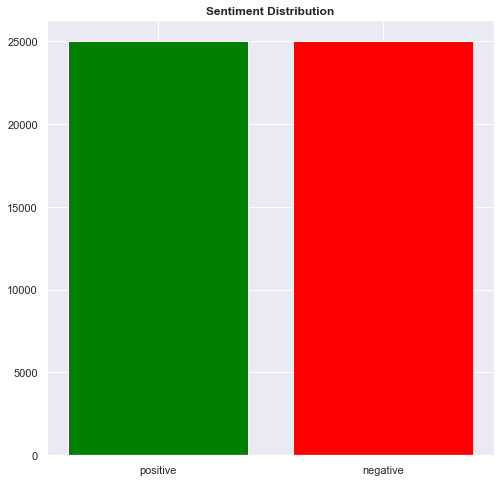

In [14]:
# create figure and axes
fig1, ax1 = plt.subplots(figsize = (8,8))

# set title
ax1.set_title('Sentiment Distribution', fontweight='bold')

# plot the bar chart
ax1.bar(sentiment_count.index, sentiment_count, color=('green','red'))

There are no missing values in the data and all are string.

In [15]:
review_n_nostr = review_df.shape[0] - sum([isinstance(i, str) for i in review_df])
sentiment_n_nostr = sentiment_df.shape[0] - sum([isinstance(i, str) for i in sentiment_df])

print(f"The number of values not string in column review is {review_n_nostr}.")
print(f"The number of missing values in sentiment column is {sentiment_n_nostr}.")

The number of values not string in column review is 0.
The number of missing values in sentiment column is 0.


## Exploring the length of the reviews

Let us create a new column with the lenght of the review text.

In [16]:
imdb_df.insert(1, column="review_length", value=[len(text) for text in review_df])
imdb_df.head()

,review,review_length,sentiment
0,One of the other reviewers has mentioned that ...,1761,positive
1,A wonderful little production. <br /><br />The...,998,positive
2,I thought this was a wonderful way to spend ti...,926,positive
3,Basically there's a family where a little boy ...,748,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",1317,positive


In [17]:
imdb_df.describe()

,review_length
count,50000.000000
mean,1309.431020
std,989.728014
min,32.000000
25%,699.000000
50%,970.000000
75%,1590.250000
max,13704.000000


C:\Users\user\miniconda3\envs\DA_ENV\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Review Text Length Distribution'}, xlabel='review_length', ylabel='Density'>

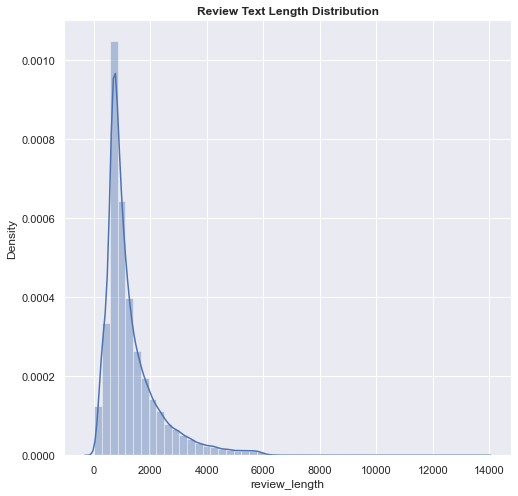

In [18]:
# create figure and axes
fig2, ax2 = plt.subplots(figsize = (8,8))

# set title
ax2.set_title('Review Text Length Distribution', fontweight='bold')

# plot the bar chart
sns.distplot(imdb_df["review_length"])

C:\Users\user\miniconda3\envs\DA_ENV\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Boxplot - Length Distribution'}, xlabel='review_length'>

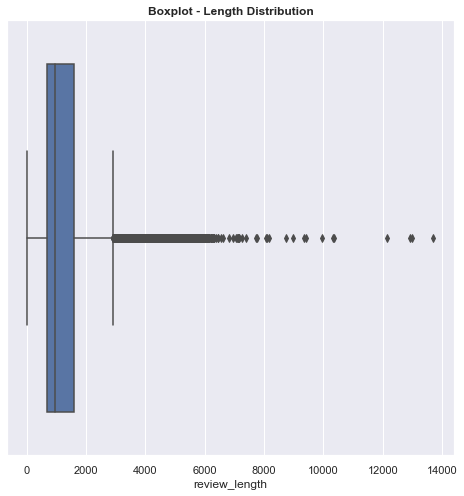

In [19]:
# create figure and axes
fig3, ax3 = plt.subplots(figsize = (8,8))

# set title
ax3.set_title('Boxplot - Length Distribution', fontweight='bold')

# plot the bar chart
sns.boxplot(imdb_df["review_length"])

## Exploring the level of impurity in the text

In [20]:
# characters considerd impure

RE_impure = re.compile(r'[&#<>{}\[\]\\]')

In [21]:
# create a new columns with the review impurity

imdb_df.insert(2, column="impurity", value=[impurity_ratio(text, RE_impure) for text in review_df])

In [22]:
imdb_df.describe()

,review_length,impurity
count,50000.000000,50000.000000
mean,1309.431020,0.006018
std,989.728014,0.007281
min,32.000000,0.000000
25%,699.000000,0.000000
50%,970.000000,0.004505
75%,1590.250000,0.009717
max,13704.000000,0.192024


In [23]:
# get the top 10 records in terms of impurity
imdb_df[['review', 'impurity']].sort_values(by='impurity', ascending=False).head(10)

,review,impurity
25373,>>>>>>>>>>>>> >>>>>>>>>>>>>>>>> >>>>>>>>>>>>>>...,0.192024
33850,This is my favorite show. I think it is utterl...,0.094915
18740,<br /><br />Human Body --- WoW.<br /><br />The...,0.084592
38230,I'd like to point out these excellent points i...,0.080381
37142,publicity got me to the theatre<br /><br />adv...,0.072398
19505,The movie was a big Car Commercial. :-)<br /><...,0.068421
3218,<br /><br />Her Excellency Madam Shabana Azmi ...,0.067606
38723,"Subject Matter: Cosmology, Quantum Physics and...",0.067416
23634,"since this is part 2, then compering it to par...",0.064309
15123,<br /><br />..this movie being one of them.<br...,0.063492


In [24]:
imdb_df.iloc[25373,0]

">>>>>>>>>>>>> >>>>>>>>>>>>>>>>> >>>>>>>>>>>>>>>>>>>>>> >>>>>>>> >>>>>>> With their no holds bar cruel offensive humor, sure enough to offended anyone, you would sure think this would be a laugh riot! ............wrong. Worest movie since Open water. Don't be to surprised if you completely miss this movie upon release date as I'm sure it wont do very good at all at the box office. This movie had a lot of Potential but fell to little to short. No enough character development, awkward actors and The upside of this movie was nudity. Boobs. Amazing. If I had to see this movie again, I myself would go POSTAl. <<<<<<<<<<<< <<<<<<<<<<<<<<<<<<<< <<<<<<<<<<<<<<<<<<<<<<<< <<<<<<<"

In [25]:
imdb_df.iloc[33850,0]

'This is my favorite show. I think it is utterly brilliant. Thanks to David Chase for bringing this into my life.<br /><br />Season 1<br /><br />1. The Sopranos: 5/5<br /><br />2. 46 Long: 4.5/5<br /><br />3. Denial, Anger, Acceptance: 5/5<br /><br />4. Meadowlands: 4/5<br /><br />5. College:<br /><br />6. Pax Soprana: 5/5<br /><br />7. Down Neck: 4.5/5<br /><br />8. The Legend of Tennessee Moltisanti: 5/5<br /><br />9. Boca: 4.5/5<br /><br />10. A Hit Is a Hit: 3.5/5<br /><br />11. Nobody Knows Anything: 5/5<br /><br />12. Isabella: 5/5<br /><br />13. I Dream of Jeannie Cusamano: 5/5'

# Cleaning and Normalising the Text Data

## Cleaning the text

In [26]:
imdb_df.insert(3, column="review_cleaned", value=[clean_text(text) for text in review_df])


In [27]:
# create a new columns with the cleaned review impurity
imdb_df.insert(4, column="cleaned_impurity", value=[impurity_ratio(text, RE_impure) for text in imdb_df["review_cleaned"]])

In [28]:
# get the top 10 records in terms of impurity
imdb_df[['review_cleaned', 'cleaned_impurity']].sort_values(by='cleaned_impurity', ascending=False).head(10)

,review_cleaned,cleaned_impurity
5685,This crock of doodoo won a award? They must ha...,0.012844
5254,This film is perfect for over the top cheesy z...,0.011461
34554,"those people,who told me""this movie is good""-s...",0.010853
49263,I loved this film! Markie Post is really great...,0.006684
25646,This movie was bad to say the least!!! The ple...,0.005917
8711,The play is cleverly constructed begin with th...,0.005666
40830,ok we have a film that some are calling one of...,0.005195
48803,I couldn't believe it when I put this movie in...,0.005093
5841,This is the movie that epitomizes the D&D fear...,0.004926
40202,"What do you do if you're Aishwarya Rai, coming...",0.004908


In [29]:
# repeat the cleaning process
imdb_df["review_cleaned"] = [clean_text(text) for text in imdb_df["review_cleaned"]]
imdb_df["cleaned_impurity"] = [impurity_ratio(text, RE_impure) for text in imdb_df["review_cleaned"]]
imdb_df[['review_cleaned', 'cleaned_impurity']].sort_values(by='cleaned_impurity', ascending=False).head(10)

,review_cleaned,cleaned_impurity
5685,This crock of doodoo won a award? They must ha...,0.012844
5254,This film is perfect for over the top cheesy z...,0.011461
34554,"those people,who told me""this movie is good""-s...",0.010853
49263,I loved this film! Markie Post is really great...,0.006684
25646,This movie was bad to say the least!!! The ple...,0.005917
40830,ok we have a film that some are calling one of...,0.005195
48803,I couldn't believe it when I put this movie in...,0.005093
5841,This is the movie that epitomizes the D&D fear...,0.004926
40202,"What do you do if you're Aishwarya Rai, coming...",0.004908
1300,I feel as though I know these people and have ...,0.004890


In [30]:
# repeat the cleaning process one more time
imdb_df["review_cleaned"] = [clean_text(text) for text in imdb_df["review_cleaned"]]
imdb_df["cleaned_impurity"] = [impurity_ratio(text, RE_impure) for text in imdb_df["review_cleaned"]]
imdb_df[['review_cleaned', 'cleaned_impurity']].sort_values(by='cleaned_impurity', ascending=False).head(15)

,review_cleaned,cleaned_impurity
5685,This crock of doodoo won a award? They must ha...,0.012844
5254,This film is perfect for over the top cheesy z...,0.011461
34554,"those people,who told me""this movie is good""-s...",0.010853
49263,I loved this film! Markie Post is really great...,0.006684
25646,This movie was bad to say the least!!! The ple...,0.005917
40830,ok we have a film that some are calling one of...,0.005195
48803,I couldn't believe it when I put this movie in...,0.005093
5841,This is the movie that epitomizes the D&D fear...,0.004926
40202,"What do you do if you're Aishwarya Rai, coming...",0.004908
1300,I feel as though I know these people and have ...,0.004890


In [31]:
imdb_df = (imdb_df.drop(["review", "impurity", "review_length"], axis=1)
           .rename({"review_cleaned": "review", "cleaned_impurity": "impurity"}, axis=1)
           )
review_df = imdb_df["review"]
sentiment_df = imdb_df["sentiment"]
imdb_df.insert(1, column="review_length", value=[len(text) for text in review_df])
imdb_df.head()

,review,review_length,impurity,sentiment
0,One of the other reviewers has mentioned that ...,1728,0.0,positive
1,A wonderful little production. The filming tec...,960,0.0,positive
2,I thought this was a wonderful way to spend ti...,904,0.0,positive
3,Basically there's a family where a little boy ...,709,0.0,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",1272,0.0,positive


In [32]:
imdb_df.describe()

,review_length,impurity
count,50000.00000,50000.000000
mean,1285.35254,0.000019
std,971.01299,0.000210
min,32.00000,0.000000
25%,689.00000,0.000000
50%,954.00000,0.000000
75%,1559.00000,0.000000
max,13592.00000,0.012844


## Character Normalization

### Hyphendation

In [33]:
imdb_df["review_norm"] = imdb_df["review"].apply(tprep.normalize.hyphenated_words) # normalize hyphendation
                       

Let us see the changes

In [34]:
imdb_df["changed"] = [imdb_df["review"][i] != imdb_df["review_norm"][i] for i in range(imdb_df["review"].shape[0])] 
imdb_df["changed"].value_counts(dropna=False)

False    50000
Name: changed, dtype: int64

In [35]:
imdb_df["review"] = imdb_df["review_norm"]

### Fancy Quotation Marks

In [36]:
imdb_df["review_norm"] = imdb_df["review"].apply(tprep.normalize.quotation_marks) # normalize fancy quotation marks to ASCII

Let us see the changes

In [37]:
imdb_df["changed"] = [imdb_df["review"][i] != imdb_df["review_norm"][i] for i in range(imdb_df["review"].shape[0])] 
imdb_df["changed"].value_counts(dropna=False)

False    49424
True       576
Name: changed, dtype: int64

In [38]:
imdb_df[imdb_df["changed"]]

,review,review_length,impurity,sentiment,review_norm,changed
123,"Ah yes the 1980s , a time of Reaganomics and S...",803,0.0,negative,"Ah yes the 1980s , a time of Reaganomics and S...",True
193,I had before a feeling of mislike for all Russ...,273,0.0,positive,I had before a feeling of mislike for all Russ...,True
310,"Some people drift through life, moving from on...",5768,0.0,positive,"Some people drift through life, moving from on...",True
352,Tell the truth I’m a bit stun to see all these...,1796,0.0,negative,Tell the truth I'm a bit stun to see all these...,True
1004,Strangely enough this movie never made it to t...,644,0.0,positive,Strangely enough this movie never made it to t...,True
...,...,...,...,...,...,...
49772,CitizenX(1995) is the developing world's answe...,6826,0.0,positive,CitizenX(1995) is the developing world's answe...,True
49781,It`s funny how instinct warns you of something...,2175,0.0,negative,It's funny how instinct warns you of something...,True
49784,Whether any indictment was intended must be ta...,1178,0.0,negative,Whether any indictment was intended must be ta...,True
49990,"Lame, lame, lame!!! A 90-minute cringe-fest th...",787,0.0,negative,"Lame, lame, lame!!! A 90-minute cringe-fest th...",True


In [39]:
row = 352

In [40]:
review_untouched_df[row]

'Tell the truth I’m a bit stun to see all these positive review by so many people, which is also the main reason why I actually decide to see this movie. And after having seen it, I was really a disappointed, and this comes from the guy that loves this genre of movie.<br /><br />I’m surprise at this movie all completely – it is like a kid’s movie with nudity for absolutely no reason and it all involve little children cursing and swearing. I’m not at all righteous but this has really gone too far in my account.<br /><br />Synopsis: The story about two guys got send to the big brother program for their reckless behavior. There they met up with one kids with boobs obsession and the other is a medieval freak.<br /><br />Just the name it self is not really connected with the story at all. They are not being a role model and or do anything but to serve their time for what they have done. The story is very predictable (though expected) and the humor is lame. And haven’t we already seen the sa

In [41]:
imdb_df.iloc[row, 0]

'Tell the truth I’m a bit stun to see all these positive review by so many people, which is also the main reason why I actually decide to see this movie. And after having seen it, I was really a disappointed, and this comes from the guy that loves this genre of movie. I’m surprise at this movie all completely – it is like a kid’s movie with nudity for absolutely no reason and it all involve little children cursing and swearing. I’m not at all righteous but this has really gone too far in my account. Synopsis: The story about two guys got send to the big brother program for their reckless behavior. There they met up with one kids with boobs obsession and the other is a medieval freak. Just the name it self is not really connected with the story at all. They are not being a role model and or do anything but to serve their time for what they have done. The story is very predictable (though expected) and the humor is lame. And haven’t we already seen the same characters (play by Mc Lovin’)

In [42]:
imdb_df.iloc[row, 4]

"Tell the truth I'm a bit stun to see all these positive review by so many people, which is also the main reason why I actually decide to see this movie. And after having seen it, I was really a disappointed, and this comes from the guy that loves this genre of movie. I'm surprise at this movie all completely – it is like a kid's movie with nudity for absolutely no reason and it all involve little children cursing and swearing. I'm not at all righteous but this has really gone too far in my account. Synopsis: The story about two guys got send to the big brother program for their reckless behavior. There they met up with one kids with boobs obsession and the other is a medieval freak. Just the name it self is not really connected with the story at all. They are not being a role model and or do anything but to serve their time for what they have done. The story is very predictable (though expected) and the humor is lame. And haven't we already seen the same characters (play by Mc Lovin')

In [43]:
imdb_df["review"] = imdb_df["review_norm"]

### Unicode

In [44]:
imdb_df["review_norm"] = imdb_df["review"].apply(tprep.normalize.unicode) # normalize unicode to ASCII

Let us see the changes

In [45]:
imdb_df["changed"] = [imdb_df["review"][i] != imdb_df["review_norm"][i] for i in range(imdb_df["review"].shape[0])] 
imdb_df["changed"].value_counts(dropna=False)

False    50000
Name: changed, dtype: int64

In [46]:
imdb_df["review"] = imdb_df["review_norm"]

### Removing the accents

In [47]:
imdb_df["review_norm"] = imdb_df["review"].apply(tprep.remove.accents) # remove accents as in ö

Let us see the changes

In [48]:
imdb_df["changed"] = [imdb_df["review"][i] != imdb_df["review_norm"][i] for i in range(imdb_df["review"].shape[0])] 
imdb_df["changed"].value_counts(dropna=False)

False    46919
True      3081
Name: changed, dtype: int64

In [49]:
imdb_df[imdb_df["changed"]]

,review,review_length,impurity,sentiment,review_norm,changed
29,'War movie' is a Hollywood genre that has been...,3736,0.0,positive,'War movie' is a Hollywood genre that has been...,True
33,One of the most significant quotes from the en...,3965,0.0,positive,One of the most significant quotes from the en...,True
40,It had all the clichés of movies of this type ...,654,0.0,negative,It had all the cliches of movies of this type ...,True
41,"This movie is based on the book, ""A Many Splen...",1282,0.0,positive,"This movie is based on the book, ""A Many Splen...",True
65,DON'T TORTURE A DUCKLING is one of Fulci's ear...,1680,0.0,positive,DON'T TORTURE A DUCKLING is one of Fulci's ear...,True
...,...,...,...,...,...,...
49878,"I have never read a Jacqueline Susann novel, b...",2466,0.0,positive,"I have never read a Jacqueline Susann novel, b...",True
49885,The Brave One seems to indicate that the main ...,3919,0.0,negative,The Brave One seems to indicate that the main ...,True
49921,"Antonio Margheriti's ""Danza Macabra"" aka. ""Cas...",2944,0.0,positive,"Antonio Margheriti's ""Danza Macabra"" aka. ""Cas...",True
49928,"I love so much about this movie: the music, th...",1098,0.0,positive,"I love so much about this movie: the music, th...",True


In [50]:
row = 40

In [51]:
review_untouched_df[row]

"It had all the clichés of movies of this type and no substance. The plot went nowhere and at the end of the movie I felt like a sucker for watching it. The production was good; however, the script and acting were B-movie quality. The casting was poor because there were good actors mixed in with crumby actors. The good actors didn't hold their own nor did they lift up the others. <br /><br />This movie is not worthy of more words, but I will say more to meet the minimum requirement of ten lines. James Wood and Cuba Gooding, Jr. play caricatures of themselves in other movies. <br /><br />If you are looking for mindless entertainment, I still wouldn't recommend this movie."

In [52]:
imdb_df.iloc[row, 0]

"It had all the clichés of movies of this type and no substance. The plot went nowhere and at the end of the movie I felt like a sucker for watching it. The production was good; however, the script and acting were B-movie quality. The casting was poor because there were good actors mixed in with crumby actors. The good actors didn't hold their own nor did they lift up the others. This movie is not worthy of more words, but I will say more to meet the minimum requirement of ten lines. James Wood and Cuba Gooding, Jr. play caricatures of themselves in other movies. If you are looking for mindless entertainment, I still wouldn't recommend this movie."

In [53]:
imdb_df.iloc[row, 4]

"It had all the cliches of movies of this type and no substance. The plot went nowhere and at the end of the movie I felt like a sucker for watching it. The production was good; however, the script and acting were B-movie quality. The casting was poor because there were good actors mixed in with crumby actors. The good actors didn't hold their own nor did they lift up the others. This movie is not worthy of more words, but I will say more to meet the minimum requirement of ten lines. James Wood and Cuba Gooding, Jr. play caricatures of themselves in other movies. If you are looking for mindless entertainment, I still wouldn't recommend this movie."

In [54]:
imdb_df["review"] = imdb_df["review_norm"]

### Masking URLs

In [55]:
imdb_df["review_norm"] = imdb_df["review"].apply(tprep.replace.urls)  # replace URLs by _URL_

Let us see the changes

In [56]:
imdb_df["changed"] = [imdb_df["review"][i] != imdb_df["review_norm"][i] for i in range(imdb_df["review"].shape[0])] 
imdb_df["changed"].value_counts(dropna=False)

False    49813
True       187
Name: changed, dtype: int64

In [57]:
imdb_df[imdb_df["changed"]]

,review,review_length,impurity,sentiment,review_norm,changed
742,Mario Lewis of the Competitive Enterprise Inst...,913,0.000000,negative,Mario Lewis of the Competitive Enterprise Inst...,True
907,Following directly from where the story left o...,4540,0.000000,positive,Following directly from where the story left o...,True
1088,This quasi J-horror film followed a young woma...,1132,0.000000,negative,This quasi J-horror film followed a young woma...,True
1137,I really think I should make my case and have ...,672,0.000000,positive,I really think I should make my case and have ...,True
1141,This show has to be my favorite out of all the...,1049,0.000000,positive,This show has to be my favorite out of all the...,True
...,...,...,...,...,...,...
48887,Trite and unoriginal. It's like someone watche...,1118,0.000000,negative,Trite and unoriginal. It's like someone watche...,True
49063,"Trick or Treat, Quickie Review This zany romp ...",1409,0.000000,positive,"Trick or Treat, Quickie Review This zany romp ...",True
49596,"This is absolutely the best 80s cartoon ever, ...",1151,0.000000,positive,"This is absolutely the best 80s cartoon ever, ...",True
49637,If you liked the Richard Chamberlain version o...,686,0.001458,positive,If you liked the Richard Chamberlain version o...,True


In [58]:
row = 742

In [59]:
review_untouched_df[row]

'Mario Lewis of the Competitive Enterprise Institute has written a definitive 120-page point-by-point, line-by-line refutation of this mendacious film, which should be titled A CONVENIENT LIE. The website address where his debunking report, which is titled "A SKEPTIC\'S GUIDE TO AN INCONVENIENT TRUTH" can be found at is :www.cei.org. A shorter 10-page version can be found at: www.cei.org/pdf/5539.pdf Once you read those demolitions, you\'ll realize that alleged "global warming" is no more real or dangerous than the Y2K scare of 1999, which Gore also endorsed, as he did the pseudo-scientific film THE DAY AFTER TOMORROW, which was based on a book written by alleged UFO abductee Whitley Strieber. As James "The Amazing" Randi does to psychics, and Philip Klass does to UFOs, and Gerald Posner does to JFK conspir-idiocy theories, so does Mario Lewis does to Al Gore\'s movie and the whole "global warming" scam.'

In [60]:
imdb_df.iloc[row, 0]

'Mario Lewis of the Competitive Enterprise Institute has written a definitive 120-page point-by-point, line-by-line refutation of this mendacious film, which should be titled A CONVENIENT LIE. The website address where his debunking report, which is titled "A SKEPTIC\'S GUIDE TO AN INCONVENIENT TRUTH" can be found at is :www.cei.org. A shorter 10-page version can be found at: www.cei.org/pdf/5539.pdf Once you read those demolitions, you\'ll realize that alleged "global warming" is no more real or dangerous than the Y2K scare of 1999, which Gore also endorsed, as he did the pseudo-scientific film THE DAY AFTER TOMORROW, which was based on a book written by alleged UFO abductee Whitley Strieber. As James "The Amazing" Randi does to psychics, and Philip Klass does to UFOs, and Gerald Posner does to JFK conspir-idiocy theories, so does Mario Lewis does to Al Gore\'s movie and the whole "global warming" scam.'

In [61]:
imdb_df.iloc[row, 4]

'Mario Lewis of the Competitive Enterprise Institute has written a definitive 120-page point-by-point, line-by-line refutation of this mendacious film, which should be titled A CONVENIENT LIE. The website address where his debunking report, which is titled "A SKEPTIC\'S GUIDE TO AN INCONVENIENT TRUTH" can be found at is :_URL_. A shorter 10-page version can be found at: _URL_ Once you read those demolitions, you\'ll realize that alleged "global warming" is no more real or dangerous than the Y2K scare of 1999, which Gore also endorsed, as he did the pseudo-scientific film THE DAY AFTER TOMORROW, which was based on a book written by alleged UFO abductee Whitley Strieber. As James "The Amazing" Randi does to psychics, and Philip Klass does to UFOs, and Gerald Posner does to JFK conspir-idiocy theories, so does Mario Lewis does to Al Gore\'s movie and the whole "global warming" scam.'

In [62]:
imdb_df["review"] = imdb_df["review_norm"]

### Masking Emojis

In [63]:
imdb_df["review_norm"] = imdb_df["review"].apply(tprep.replace.emojis)  # replace emojis by _EMOJI_

Let us see the changes

In [64]:
imdb_df["changed"] = [imdb_df["review"][i] != imdb_df["review_norm"][i] for i in range(imdb_df["review"].shape[0])] 
imdb_df["changed"].value_counts(dropna=False)

False    49999
True         1
Name: changed, dtype: int64

In [65]:
imdb_df[imdb_df["changed"]]

,review,review_length,impurity,sentiment,review_norm,changed
44503,This review contains spoilers. I was searching...,2134,0.0,negative,This review contains spoilers. I was searching...,True


In [66]:
row = 44503

In [67]:
review_untouched_df[row]

'This review contains spoilers.<br /><br />I was searching through horror movie DVDs on Amazon when I came across Flight Of The Living Dead. I already knew from the name that it was going to be abysmally naff and most probably a rip-off of Snakes On A Plane, but it was selling brand new for 69p so I figured I didn\'t really have much to lose.<br /><br />The music played over the opening credits didn\'t fit at all, although I did like the song itself a pop-rock song isn\'t really suitable to appear on the soundtrack of a zombie horror movie. It started off surprisingly well, the opening scenes weren\'t too bad, some of the acting was a little cringe-worthy but not as bad as I initially thought it would be.<br /><br />It all goes well until Laura Cayouette (Rocket from Kill Bill: Vol. 2) enters the picture. She is supposed to be playing a scientist. If she is, she\'s not a very bright one. Luckily she\'s polished off pretty quickly.<br /><br />I actually physically laughed out loud when 

In [68]:
imdb_df.iloc[row, 0]

'This review contains spoilers. I was searching through horror movie DVDs on Amazon when I came across Flight Of The Living Dead. I already knew from the name that it was going to be abysmally naff and most probably a rip-off of Snakes On A Plane, but it was selling brand new for 69p so I figured I didn\'t really have much to lose. The music played over the opening credits didn\'t fit at all, although I did like the song itself a pop-rock song isn\'t really suitable to appear on the soundtrack of a zombie horror movie. It started off surprisingly well, the opening scenes weren\'t too bad, some of the acting was a little cringe-worthy but not as bad as I initially thought it would be. It all goes well until Laura Cayouette (Rocket from Kill Bill: Vol. 2) enters the picture. She is supposed to be playing a scientist. If she is, she\'s not a very bright one. Luckily she\'s polished off pretty quickly. I actually physically laughed out loud when the camera panned over the passengers of the

In [69]:
imdb_df.iloc[row, 4]

'This review contains spoilers. I was searching through horror movie DVDs on Amazon when I came across Flight Of The Living Dead. I already knew from the name that it was going to be abysmally naff and most probably a rip-off of Snakes On A Plane, but it was selling brand new for 69p so I figured I didn\'t really have much to lose. The music played over the opening credits didn\'t fit at all, although I did like the song itself a pop-rock song isn\'t really suitable to appear on the soundtrack of a zombie horror movie. It started off surprisingly well, the opening scenes weren\'t too bad, some of the acting was a little cringe-worthy but not as bad as I initially thought it would be. It all goes well until Laura Cayouette (Rocket from Kill Bill: Vol. 2) enters the picture. She is supposed to be playing a scientist. If she is, she\'s not a very bright one. Luckily she\'s polished off pretty quickly. I actually physically laughed out loud when the camera panned over the passengers of the

In [70]:
imdb_df["review"] = imdb_df["review_norm"]

### Masking Emails

In [71]:
imdb_df["review_norm"] = imdb_df["review"].apply(tprep.replace.emails)  # replace emails by _EMAIL_

Let us see the changes

In [72]:
imdb_df["changed"] = [imdb_df["review"][i] != imdb_df["review_norm"][i] for i in range(imdb_df["review"].shape[0])] 
imdb_df["changed"].value_counts(dropna=False)

False    49952
True        48
Name: changed, dtype: int64

In [73]:
imdb_df[imdb_df["changed"]]

,review,review_length,impurity,sentiment,review_norm,changed
1281,I like many others saw this as a child and I l...,987,0.000000,positive,I like many others saw this as a child and I l...,True
3568,I have noticed that people have asked if anyon...,753,0.000000,positive,I have noticed that people have asked if anyon...,True
5068,Brilliant adaptation of the largely interior m...,934,0.000000,positive,Brilliant adaptation of the largely interior m...,True
8176,I could never remember the name of this show. ...,737,0.000000,positive,I could never remember the name of this show. ...,True
8474,I'm like the rest of the fans who love this co...,761,0.000000,positive,I'm like the rest of the fans who love this co...,True
9510,I cant believe how many excellent actors can b...,680,0.000000,positive,I cant believe how many excellent actors can b...,True
9978,I really can't say too much more about the plo...,803,0.000000,positive,I really can't say too much more about the plo...,True
12166,Robert Jordan is a television star. Robert Jor...,592,0.000000,positive,Robert Jordan is a television star. Robert Jor...,True
13471,This movie was everything but boring. It deals...,784,0.000000,positive,This movie was everything but boring. It deals...,True
13741,I LOVE this movie. and Disney channel is ridic...,795,0.000000,positive,I LOVE this movie. and Disney channel is ridic...,True


In [74]:
row = 1281

In [75]:
review_untouched_df[row]

"I like many others saw this as a child and I loved it and it horrified me up until adulthood, I have been trying to find this movie and even been searching for it to play again on TV someday, since it originally played on USA networks. Does Anyone know where to buy this movie, or does anyone have it and would be willing to make a copy for me? Also does anyone know if there is a chance for it to be played on TV again? Maybe all of us fans should write a station in hopes of them airing it again. I don't think they did a good job of promoting this movie in the past because no one really knows about, people only know of the Stepford wives and Stepford husband movies. No one is familiar with the fact that there was a children version. Maybe they should also do a re-make of it since they seem to be doing that a lot lately with a lot of my favorite old thriller/horror flicks. Well if anyone has any input Please I Beg Of You write me with information. Thanks Taira tcampo23@aol.com"

In [76]:
imdb_df.iloc[row, 0]

"I like many others saw this as a child and I loved it and it horrified me up until adulthood, I have been trying to find this movie and even been searching for it to play again on TV someday, since it originally played on USA networks. Does Anyone know where to buy this movie, or does anyone have it and would be willing to make a copy for me? Also does anyone know if there is a chance for it to be played on TV again? Maybe all of us fans should write a station in hopes of them airing it again. I don't think they did a good job of promoting this movie in the past because no one really knows about, people only know of the Stepford wives and Stepford husband movies. No one is familiar with the fact that there was a children version. Maybe they should also do a re-make of it since they seem to be doing that a lot lately with a lot of my favorite old thriller/horror flicks. Well if anyone has any input Please I Beg Of You write me with information. Thanks Taira tcampo23@aol.com"

In [77]:
imdb_df.iloc[row, 4]

"I like many others saw this as a child and I loved it and it horrified me up until adulthood, I have been trying to find this movie and even been searching for it to play again on TV someday, since it originally played on USA networks. Does Anyone know where to buy this movie, or does anyone have it and would be willing to make a copy for me? Also does anyone know if there is a chance for it to be played on TV again? Maybe all of us fans should write a station in hopes of them airing it again. I don't think they did a good job of promoting this movie in the past because no one really knows about, people only know of the Stepford wives and Stepford husband movies. No one is familiar with the fact that there was a children version. Maybe they should also do a re-make of it since they seem to be doing that a lot lately with a lot of my favorite old thriller/horror flicks. Well if anyone has any input Please I Beg Of You write me with information. Thanks Taira _EMAIL_"

In [78]:
imdb_df["review"] = imdb_df["review_norm"]

## Creating and storing the cleaned dataset

In [79]:
imdb_df = imdb_df.drop(["impurity", "review_length", "review_norm", "changed"], axis=1)
review_df = imdb_df["review"]
sentiment_df = imdb_df["sentiment"]
imdb_df.insert(1, column="review_length", value=[len(text) for text in review_df])
imdb_df.insert(2, column="impurity", value=[impurity_ratio(text, RE_impure) for text in review_df])
imdb_df.head()

,review,review_length,impurity,sentiment
0,One of the other reviewers has mentioned that ...,1728,0.0,positive
1,A wonderful little production. The filming tec...,960,0.0,positive
2,I thought this was a wonderful way to spend ti...,904,0.0,positive
3,Basically there's a family where a little boy ...,709,0.0,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",1272,0.0,positive


In [80]:
imdb_df.describe()

,review_length,impurity
count,50000.000000,50000.000000
mean,1285.222000,0.000019
std,970.969291,0.000210
min,32.000000,0.000000
25%,689.000000,0.000000
50%,954.000000,0.000000
75%,1559.000000,0.000000
max,13592.000000,0.012844
